 Using the original reference DEM, develop a script to generate an animation (gif, mp4 etc) of different hillshade azimuths (0-360°) at a suitable elevation angle and altitude. The colour palette can be greyscale. Output -> 10 second animation of changing sun azimuths in any suitable format, such as an animated gif or movie file.
 
### Useful refs
* http://desktop.arcgis.com/en/arcmap/10.3/tools/spatial-analyst-toolbox/how-hillshade-works.htm
* https://github.com/openterrain/spark-chunker/blob/master/hillshade/hillshade.py
* QGIS -> https://opengislab.com/blog/2018/3/20/3d-dem-visualization-in-qgis-30

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
from matplotlib.colors import LightSource
import numpy as np
import numpy as np
from numpy import gradient
from numpy import pi
from numpy import arctan
from numpy import arctan2
from numpy import sin
from numpy import cos
from numpy import sqrt
from numpy import zeros
from numpy import uint8
import rasterio
from rasterio.plot import show

%matplotlib inline

In [2]:
ref_file = 'Reference_DEM.tif'
dem = rasterio.open(ref_file)

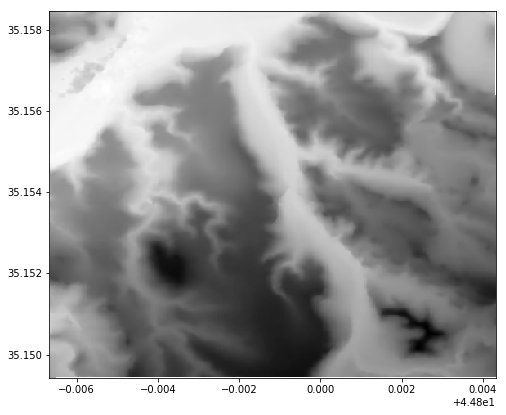

In [3]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))
show(dem, ax, cmap='Greys');

## Hillshade
Hillshade is used to visualize the hypothetical illumination value (from 0-255) of each pixel on a surface given a specified light source. To calculate hillshade, we need the zenith (altitude) and azimuth of the illumination source, as well as the slope and aspect of the terrain. The formula for hillshade is:

$$Hillshade = 255.0 * (( cos(zenith_I)*cos(slope_T))+(sin(zenith_I)*sin(slope_T)*cos(azimuth_I-aspect_T))$$

where all angles are in radians.

Extract data and do calcs. First get the array data

In [4]:
array = dem.read(1)

Check values in data

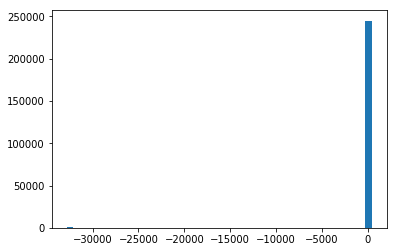

In [5]:
plt.hist(array.flatten(), bins=50);

In [6]:
array[array < 0] = 0 # set negative values to zero

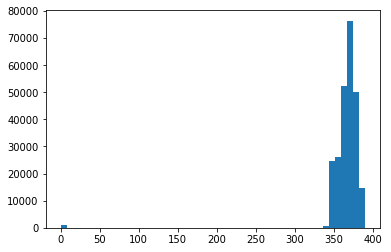

In [7]:
plt.hist(array.flatten(), bins=50);

That zero will cause a problem with our gradient calculation later, lets set anything below 340 to 340

In [8]:
array[array < 340] = 340 # set negative values to zero

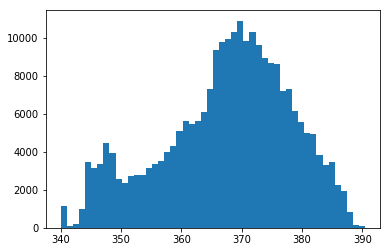

In [9]:
plt.hist(array.flatten(), bins=50);

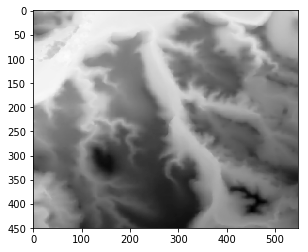

In [10]:
plt.imshow(array, cmap='Greys')

OK that looks reasonable. Now lets do the hillshade calculation.

In [11]:
def hillshade(array, azimuth, angle_altitude):
    """
    Calc hillshade.
    """
    x, y = gradient(array, 2, 2)
    slope = pi/2. - arctan(sqrt(x*x + y*y))
    aspect = arctan2(-x, y)
    azimuthrad = azimuth*pi / 180.
    altituderad = angle_altitude*pi / 180.


    shaded = sin(altituderad) * sin(slope)\
     + cos(altituderad) * cos(slope)\
     * cos(azimuthrad - aspect)
    return 255*(shaded + 1)/2

In [23]:
def update(azimuth):
    """
    Convenience to plot hillshade.
    """
    hillshade_transparency = 0.8
    fig_size = 7
    fig, ax = plt.subplots(1, 1, figsize=(fig_size,fig_size))
    ax.imshow(array, cmap='Greys', animated=True) #  
    ax.imshow(hillshade(array, azimuth=azimuth, angle_altitude=45), cmap='Greys', alpha=hillshade_transparency, animated=True)
    figname = f'azi_{azimuth}.png'
    fig.savefig(figname)
    return figname

/Users/robincole/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


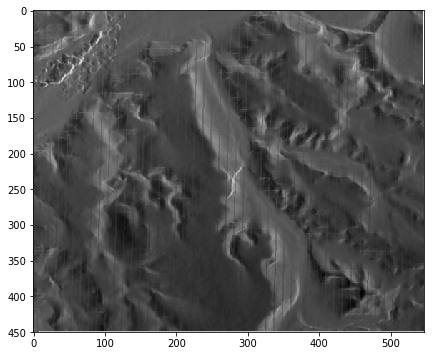

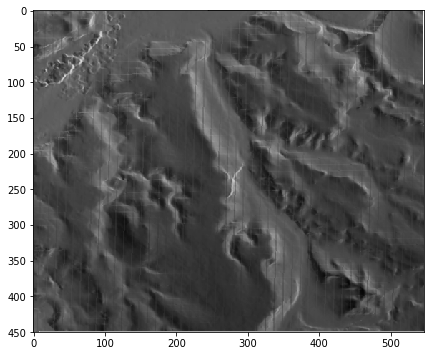

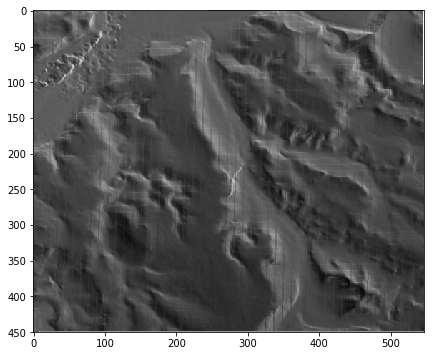

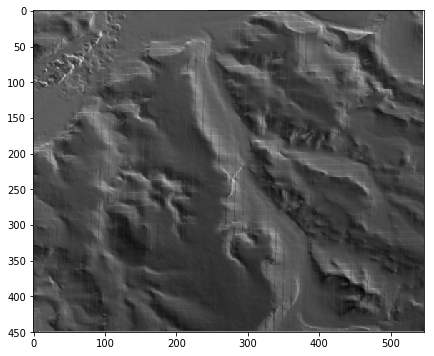

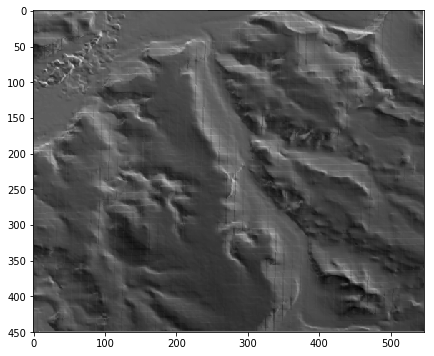

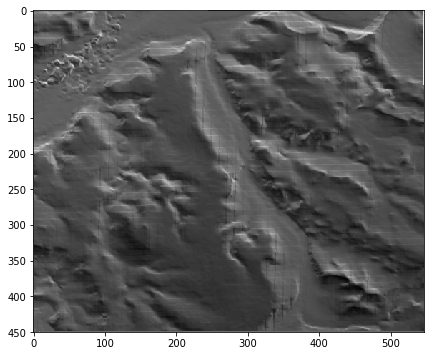

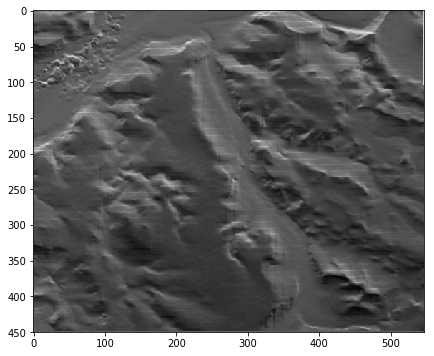

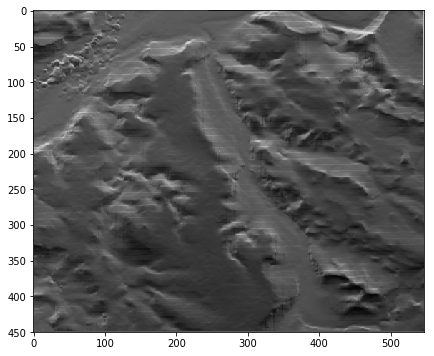

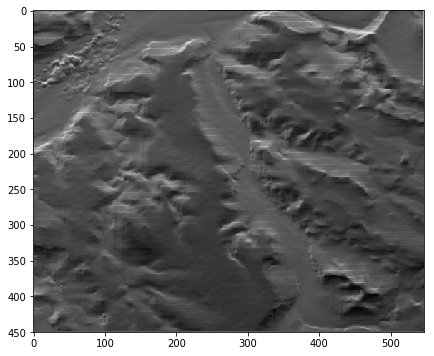

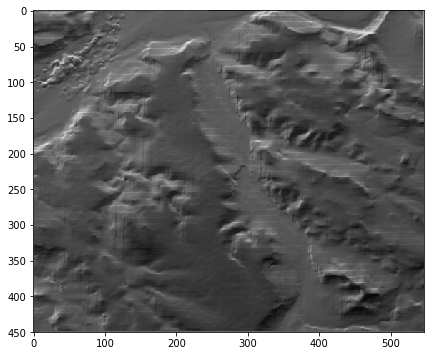

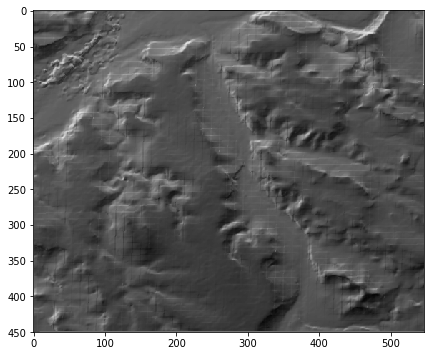

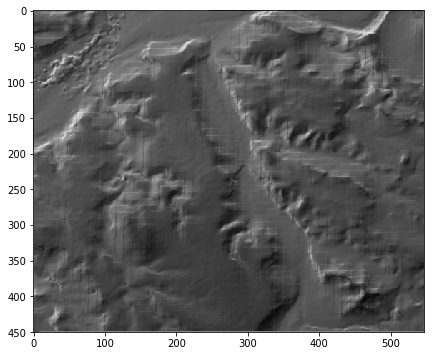

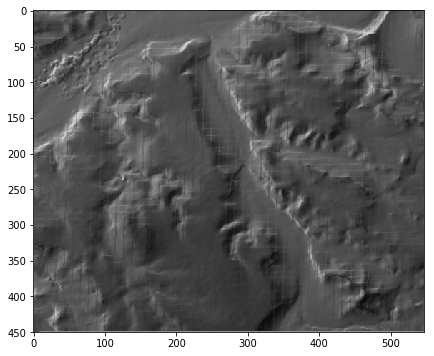

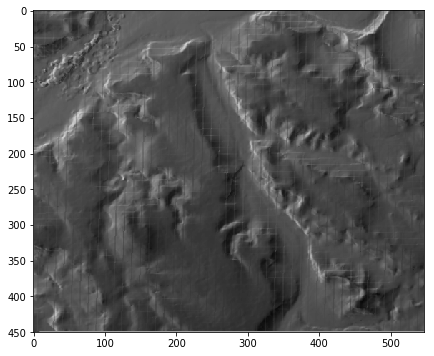

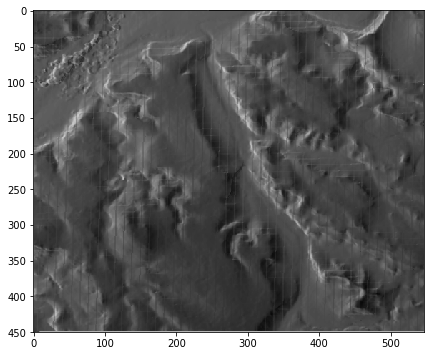

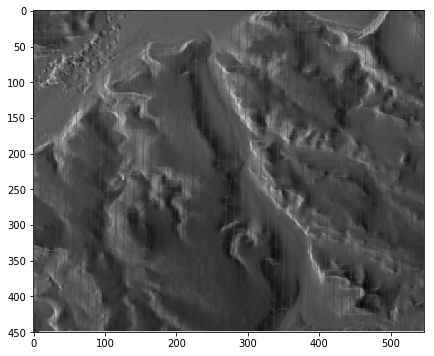

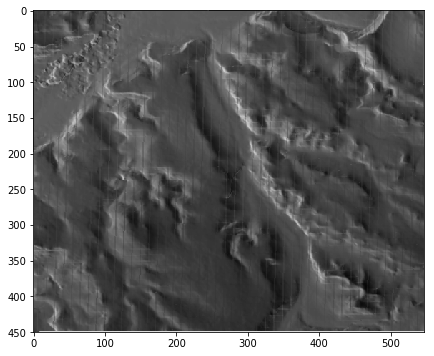

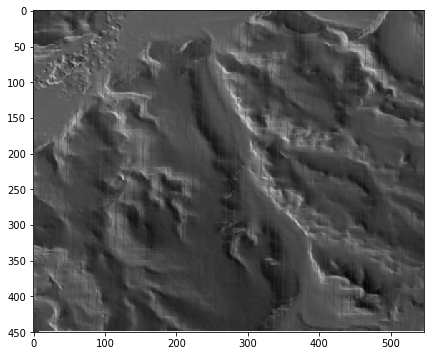

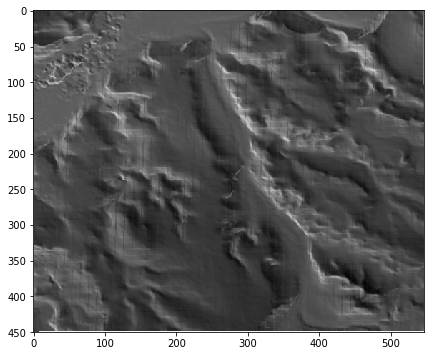

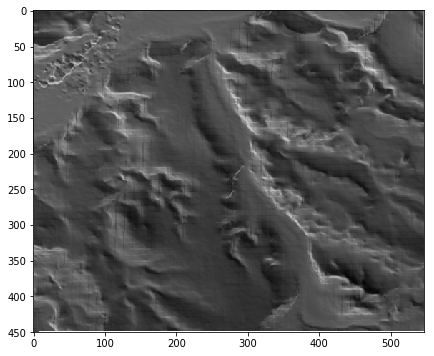

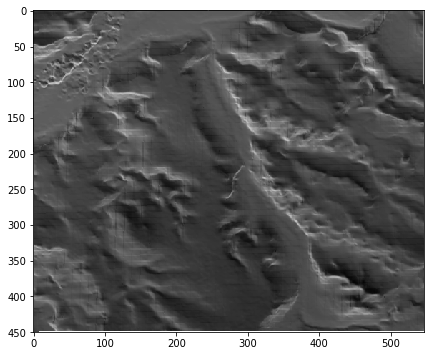

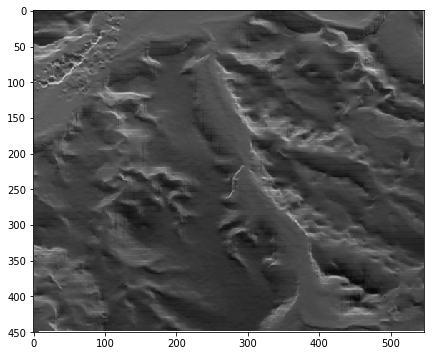

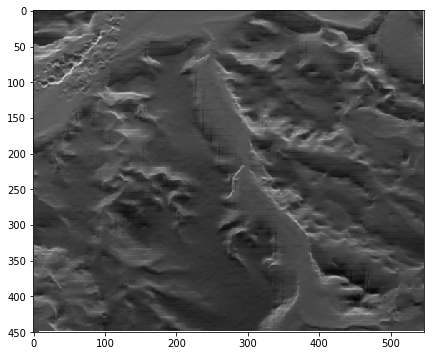

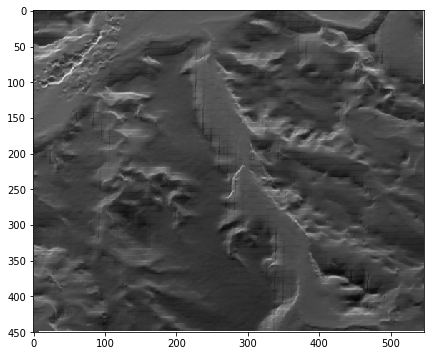

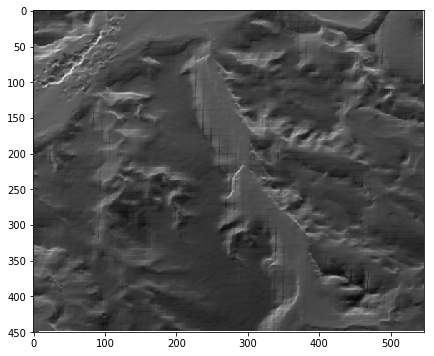

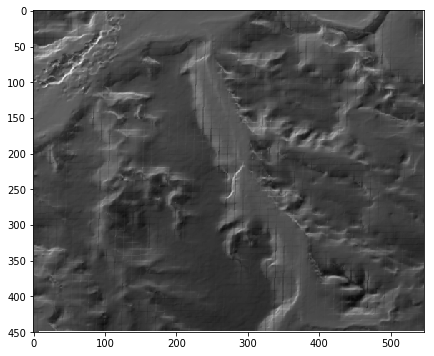

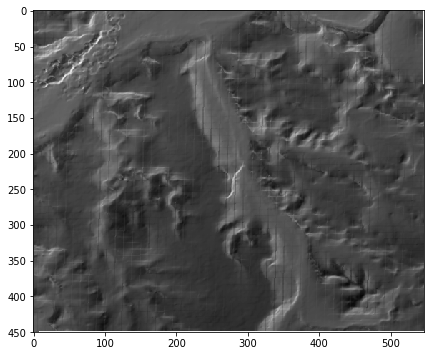

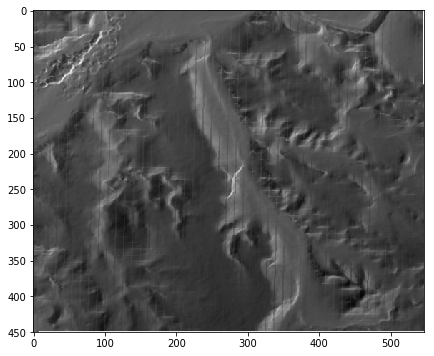

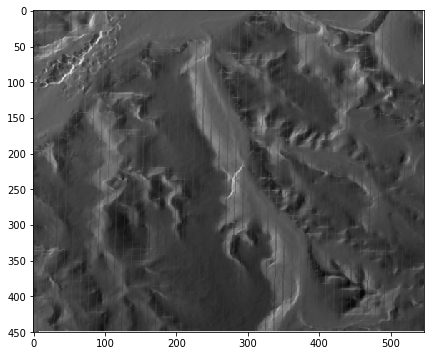

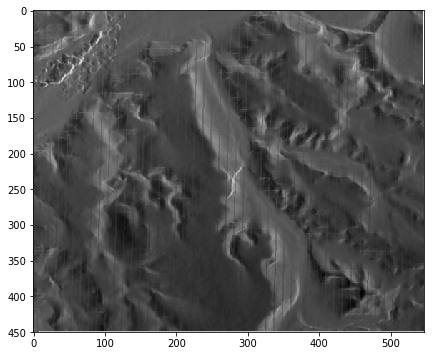

In [24]:
azimuths = np.linspace(0,360, 30)
fignames = []
for i, azimuth_angle in enumerate(azimuths):
    fignames.append(update(azimuth_angle))

In [25]:
len(fignames)

30

In [26]:
video_name = 'video.avi'

frame = cv2.imread(fignames[0])
height, width, layers = frame.shape

video = cv2.VideoWriter(video_name, 0, 1, (width,height))

for image in fignames:
    video.write(cv2.imread(image))

cv2.destroyAllWindows()
video.release()

## Create movie
Create list of images.

CPU times: user 73.9 ms, sys: 10.3 ms, total: 84.2 ms
Wall time: 83.3 ms


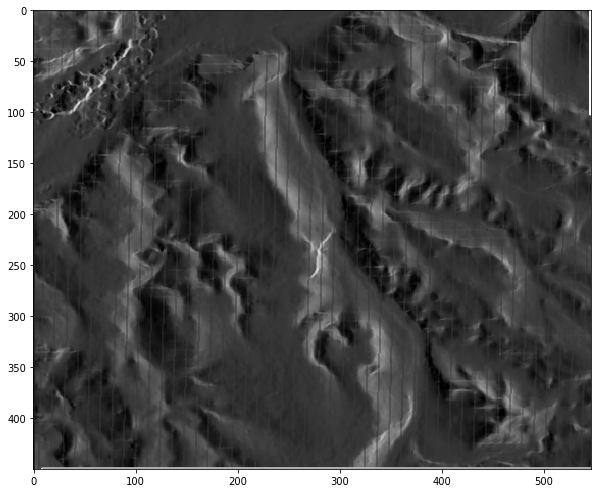

In [16]:
%%time
azimuths = np.linspace(0,360, 6)

fig_size = 10
fig = plt.figure(figsize=(fig_size,fig_size))
angle_altitude=45

ims = []
for i, azimuth_angle in enumerate(azimuths):
    im = plt.imshow(hillshade(array, 
                              azimuth=azimuth_angle, 
                              angle_altitude=angle_altitude), cmap='Greys', animated=True)
    
    ims.append([im])

In [17]:
ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
ani.save('hillshade_movie.mp4')

CPU times: user 498 ms, sys: 46.1 ms, total: 544 ms
Wall time: 691 ms


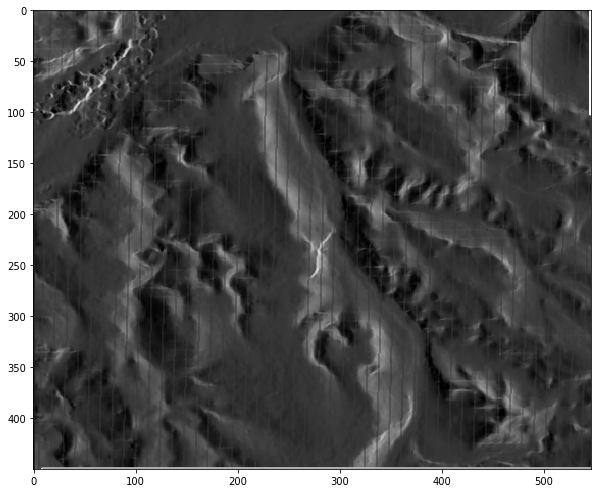

In [18]:
%%time
fig_size = 10
fig = plt.figure(figsize=(fig_size,fig_size))
angle_altitude=45

ims = []
for i, azimuth_angle in enumerate(azimuths):
    im = plt.imshow(hillshade(array, 
                              azimuth=azimuth_angle, 
                              angle_altitude=angle_altitude), cmap='Greys', animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)

ani.save('hillshade_movie.mp4')

CPU times: user 433 ms, sys: 31.3 ms, total: 464 ms
Wall time: 570 ms


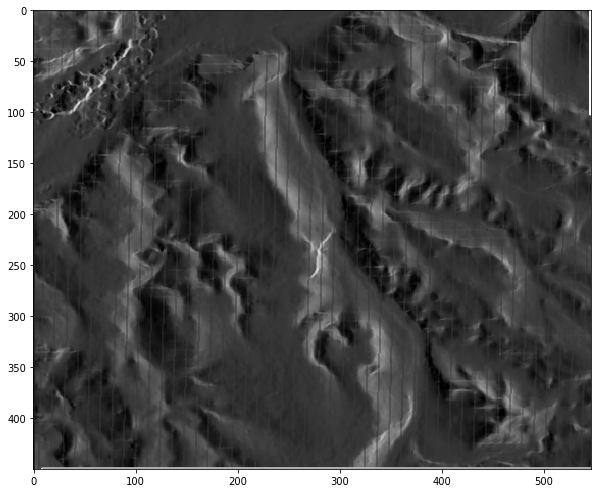

In [19]:
%%time
fig_size = 10
fig = plt.figure(figsize=(fig_size,fig_size))
angle_altitude=45

ims = []
for i, azimuth_angle in enumerate(azimuths):
    im = plt.imshow(hillshade(array, 
                              azimuth=azimuth_angle, 
                              angle_altitude=angle_altitude), cmap='Greys', animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)

ani.save('hillshade_movie.mp4')